# Black-Scholes-Merton Equation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

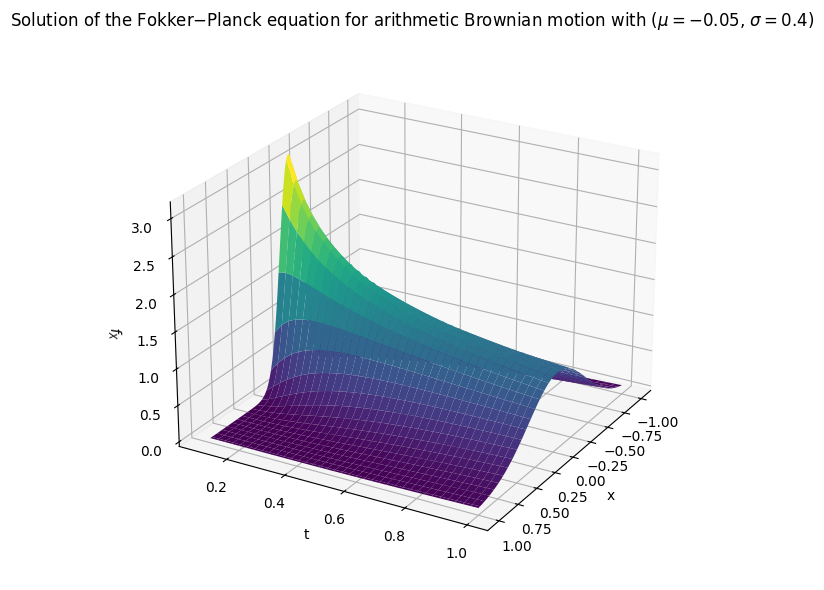

In [10]:
# a) Plot the solutions of the Diffusion equation
T = 1.0         # time horizon
nsteps = 200    # number of time steps
dt = T / nsteps
t = np.linspace(0, T, nsteps + 1)

mu = -0.05
sigma = 0.4

D = sigma**2 / 2
x_vals = np.arange(-1, 1.02, 0.02)
t_vals = np.arange(0.1, 1.025, 0.025)
x, tt = np.meshgrid(x_vals, t_vals)

f = (1 / (2 * np.sqrt(np.pi * D * tt))) * np.exp(-(x - mu * tt)**2 / (4 * D * tt))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, tt, f, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$f_X$')
ax.set_title(r'Solution of the Fokker−Planck equation for arithmetic Brownian motion with ($\mu = -0.05$, $\sigma = 0.4$)')
ax.view_init(24, 30)
plt.tight_layout()
plt.show()

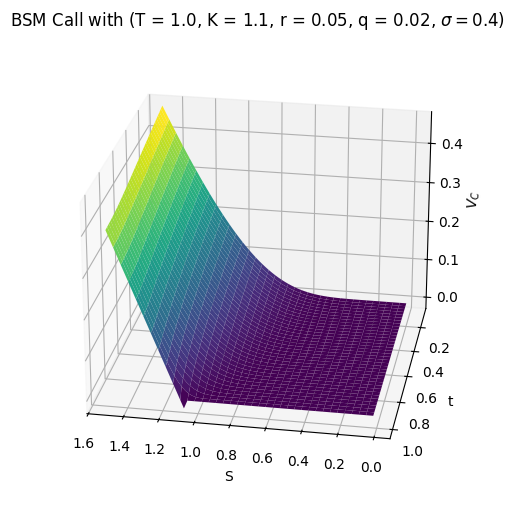

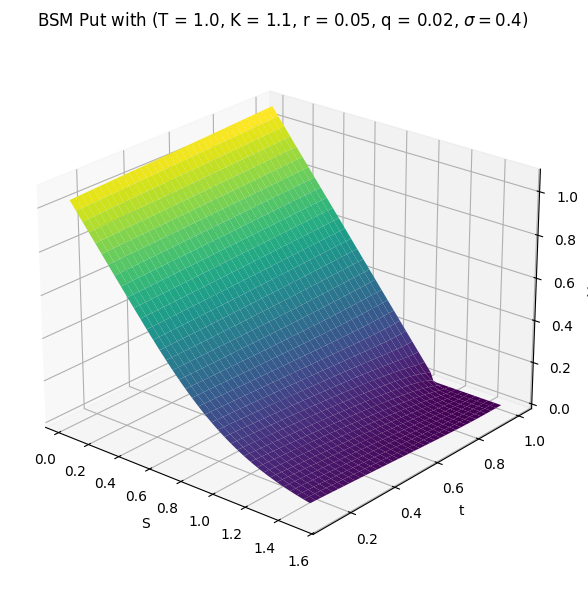

In [54]:
# b) Plot the solutions of the Black−Scholes−Merton equation
T = 1.0         # time horizon
dt = 0.025
K = 1.1
r = 0.05
q = 0.02
mu = -0.05
sigma = 0.4

S_vals = np.arange(0.02, 1.52, 0.02)
t_vals = np.arange(0.1, T + dt, dt)
S, t = np.meshgrid(S_vals, t_vals)

d1 = (np.log(S/K) + (r - q + (sigma**2 / 2) * (T - t))) / (sigma * np.sqrt(T - t))
d2 = (np.log(S/K) + (r - q - (sigma**2 / 2) * (T - t))) / (sigma * np.sqrt(T - t))

def F_N(x):
    return 0.5 * (1 + special.erf(x / np.sqrt(2)))

VC = S * np.exp(-q * (T - t)) * F_N(d1) - K * np.exp(-r * (T - t)) * F_N(d2)
VP = K * np.exp(-r * (T - t)) * F_N(-d2) - S * np.exp(-q * (T - t)) * F_N(-d1)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, t, VC, cmap='viridis')
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel(r'$V_C$')
ax.set_title(r'BSM Call with (T = {T}, K = {K}, r = {r}, q = {q}, $\sigma = {sigma}$)'.format(T=T, K=K, r=r, q=q, sigma=sigma))
ax.view_init(24, 100)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, t, VP, cmap='viridis')
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel(r'$V_P$')
ax.set_title(r'BSM Put with (T = {T}, K = {K}, r = {r}, q = {q}, $\sigma = {sigma}$)'.format(T=T, K=K, r=r, q=q, sigma=sigma))
ax.view_init(24, -50)

plt.tight_layout()
plt.show()

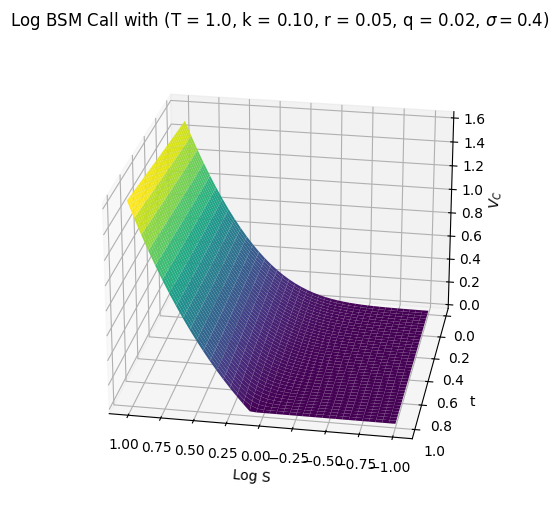

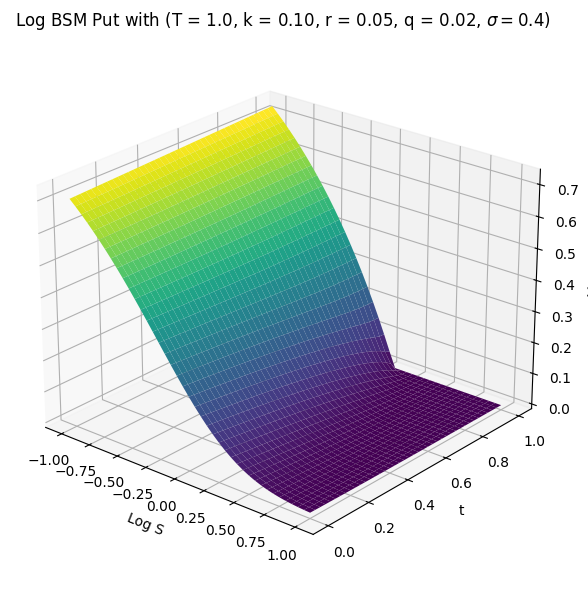

In [66]:
# c) Plot the solutions of the Black−Scholes equation as a function of the log price k = log(K/S0)

T = 1.0         # time horizon
dt = 0.025
S0 = 1.0  # initial price (assumed)
K = 1.1
k = np.log(K / S0)
r = 0.05
q = 0.02
mu = -0.05
sigma = 0.4

x_vals = np.arange(-1, 1.05, 0.05)
t_vals = np.arange(0, T + dt, dt)
x, t = np.meshgrid(x_vals, t_vals)

tau = T - t
tau[tau == 0] = 1e-12

F = S0 * np.exp(x - q * tau)

d1 = (x - k + (r - q + (sigma**2 / 2) * tau)) / (sigma * np.sqrt(tau))
d2 = (x - k + (r - q - (sigma**2 / 2) * tau)) / (sigma * np.sqrt(tau))

m = 0.5 * (d1 + d2)

def F_N(x):
    return 0.5 * (1 + special.erf(x / np.sqrt(2)))

VC = np.exp(-r * tau) * (F * F_N(d1) - K * F_N(d2))
VP = -np.exp(-r * tau) * (F * F_N(-d1) - K * F_N(-d2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, VC, cmap='viridis')
ax.set_xlabel('Log S')
ax.set_ylabel('t')
ax.set_zlabel(r'$V_C$')
ax.set_title(r'Log BSM Call with (T = {T}, k = {k:.2f}, r = {r}, q = {q}, $\sigma = {sigma}$)'.format(T=T, k=k, r=r, q=q, sigma=sigma))
ax.view_init(24, 100)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, t, VP, cmap='viridis')
ax.set_xlabel('Log S')
ax.set_ylabel('t')
ax.set_zlabel(r'$V_P$')
ax.set_title(r'Log BSM Put with (T = {T}, k = {k:.2f}, r = {r}, q = {q}, $\sigma = {sigma}$)'.format(T=T, k=k, r=r, q=q, sigma=sigma))
ax.view_init(24, -50)

plt.tight_layout()
plt.show()

## d) 1. Drift–Diffusion (Fokker–Planck) Equation Verification

We consider the drift–diffusion (Fokker–Planck) equation for arithmetic Brownian motion:

$$
\frac{\partial f}{\partial t}
= -\mu \frac{\partial f}{\partial x}
+ D \frac{\partial^2 f}{\partial x^2},
$$

with the solution

$$
f(x,t) = \frac{1}{2\sqrt{\pi D t}}
\exp\!\left(-\frac{(x - \mu t)^2}{4 D t}\right),
$$
where $ D > 0 $ and $ \mu $ are constants.

---

### Derivatives

Let
$$
A(t) = \frac{1}{2\sqrt{\pi D t}}, \qquad
B(x,t) = \frac{(x - \mu t)^2}{4 D t},
\quad \text{so that } f = A e^{-B}.
$$

#### First and second spatial derivatives
$$
\frac{\partial f}{\partial x}
= -f \frac{x - \mu t}{2 D t},
$$
$$
\frac{\partial^2 f}{\partial x^2}
= f \frac{(x - \mu t)^2}{4 D^2 t^2}
- f \frac{1}{2 D t}.
$$

Hence
$$
D f_{xx}
= f \frac{(x - \mu t)^2}{4 D t^2}
- f \frac{1}{2 t}.
$$

#### Time derivative
Since
$$
A'(t) = -\frac{A}{2t}, \qquad
B_t = \frac{1}{4D}\left(
-\frac{2\mu(x - \mu t)}{t}
- \frac{(x - \mu t)^2}{t^2}
\right),
$$
we have
$$
f_t = f\!\left(
-\frac{1}{2t}
+ \frac{\mu(x - \mu t)}{2D t}
+ \frac{(x - \mu t)^2}{4D t^2}
\right).
$$

#### Right–hand side of PDE
$$
-\mu f_x + D f_{xx}
= f \frac{\mu(x - \mu t)}{2D t}
+ f \frac{(x - \mu t)^2}{4D t^2}
- f \frac{1}{2t}.
$$

This matches exactly the expression for $ f_t $, hence

$$
\boxed{\,f_t = -\mu f_x + D f_{xx}\,}.
$$

Therefore the Gaussian form with drifting mean is indeed a solution of the Fokker–Planck equation.

---


## e) Black–Scholes–Merton Equation Verification

The **Black–Scholes–Merton (BSM)** PDE for a European call option is

$$
\frac{\partial C}{\partial t}
+ (r - q) S \frac{\partial C}{\partial S}
+ \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2}
- r C = 0.
$$

The analytical solution is

$$
C(S,t)
= S e^{-q\tau} N(d_1)
- K e^{-r\tau} N(d_2),
\quad
\tau = T - t,
$$
with
$$
d_{1,2}
= \frac{\ln(S/K) + (r - q \pm \tfrac{1}{2}\sigma^2)\tau}
{\sigma \sqrt{\tau}},
$$
and $ N(\cdot) $ the standard normal CDF.

---

### Useful derivatives

$$
C_S = e^{-q\tau} N(d_1),
$$
$$
C_{SS} = e^{-q\tau} \phi(d_1)
\frac{1}{S \sigma \sqrt{\tau}},
$$
where $ \phi(x) = \tfrac{1}{\sqrt{2\pi}} e^{-x^2/2} $.

Differentiating with respect to $\tau$ (using $ C_t = -C_\tau $) gives

$$
C_t
= -q S e^{-q\tau} N(d_1)
+ r K e^{-r\tau} N(d_2)
+ \frac{1}{2}\sigma S e^{-q\tau} \frac{\phi(d_1)}{\sqrt{\tau}}.
$$

---

### Substituting into the PDE

Substitute the expressions for $C_t$, $C_S$, and $C_{SS}$ into

$$
C_t + (r - q) S C_S + \tfrac{1}{2} \sigma^2 S^2 C_{SS} - r C.
$$

After simplification—using $ d_2 = d_1 - \sigma\sqrt{\tau} $ and
$ S e^{-q\tau}\phi(d_1) = K e^{-r\tau}\phi(d_2) $—all terms cancel, yielding

$$
\boxed{
C_t + (r - q) S C_S
+ \tfrac{1}{2}\sigma^2 S^2 C_{SS}
- r C = 0.
}
$$

Hence the Black–Scholes closed-form solution satisfies its PDE.

---

### Numerical check (optional)

You can verify this numerically in Python:

```python
# Finite-difference PDE residual check
dS = S[1,0] - S[0,0]
dt = t[0,1] - t[0,0]
CS = np.gradient(C, dS, axis=0)
CSS = np.gradient(CS, dS, axis=0)
Ct = np.gradient(C, dt, axis=1)
residual = Ct + (r - q)*S*CS + 0.5*sigma**2*S**2*CSS - r*C
print(np.nanmax(np.abs(residual)))
```

The residual should be close to zero except at the boundary ( \tau = 0 ), confirming that the analytical solution satisfies the BSM PDE.

---

## f) Change of variables that transform the Black-Scholes-Merton equation into the diffusion equation

We start with the **Black–Scholes–Merton (BSM) PDE** for a European call option:

$$
\frac{\partial V}{\partial t}
+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
+ r S \frac{\partial V}{\partial S}
- r V = 0,
$$

subject to the **terminal and boundary conditions**

$$
V(S,T) = \max(S - K, 0),
$$

$$
V(0,t) = 0, \qquad V(S,t) \sim S \quad \text{as } S \to \infty.
$$

The option value $V(S,t)$ is defined on the domain $0 < S < \infty,\; 0 \le t \le T.$

---

### Step 1. Rewriting the Equation

The equation can be expressed equivalently as

$$
\frac{\partial V}{\partial t}
+ \frac{1}{2}\sigma^2 (S \frac{\partial}{\partial S})^2 V
+ (r - \tfrac{1}{2}\sigma^2) S \frac{\partial V}{\partial S}
- r V = 0.
$$

We now apply the **change of variables**

$$
S = e^{y}, \qquad t = T - \tau.
$$

Then

$$
S \frac{\partial}{\partial S} \to \frac{\partial}{\partial y}, \qquad
\frac{\partial}{\partial t} \to -\frac{\partial}{\partial \tau}.
$$

Substituting into the PDE yields a **constant-coefficient equation**:

$$
\frac{\partial V}{\partial \tau}
- \frac{1}{2}\sigma^2 \frac{\partial^2 V}{\partial y^2}
- (r - \tfrac{1}{2}\sigma^2) \frac{\partial V}{\partial y}
+ r V = 0. \tag{1}
$$

---

### Step 2. Eliminating the $rV$ Term

Let

$$
u(y,\tau) = e^{r\tau} V(y,\tau).
$$

Then

$$
\frac{\partial u}{\partial \tau}
= r e^{r\tau} V + e^{r\tau} \frac{\partial V}{\partial \tau},
\qquad
\frac{\partial u}{\partial y}
= e^{r\tau} \frac{\partial V}{\partial y},
\qquad
\frac{\partial^2 u}{\partial y^2}
= e^{r\tau} \frac{\partial^2 V}{\partial y^2}.
$$

Substituting into (1) and simplifying gives

$$
\frac{\partial u}{\partial \tau}
- \frac{1}{2}\sigma^2 \frac{\partial^2 u}{\partial y^2}
- (r - \tfrac{1}{2}\sigma^2) \frac{\partial u}{\partial y} = 0. \tag{2}
$$

---

### Step 3. Removing the First-Order Term

Introduce a new variable

$$
x = y + (r - \tfrac{1}{2}\sigma^2)\tau.
$$

Then

$$
\frac{\partial}{\partial y} = \frac{\partial}{\partial x}, \qquad
\frac{\partial}{\partial \tau} = \frac{\partial}{\partial \tau} + (r - \tfrac{1}{2}\sigma^2)\frac{\partial}{\partial x}.
$$

Substituting these into equation (2) cancels the first-order term, yielding the **standard heat equation**

$$
\frac{\partial u}{\partial \tau}
= \frac{1}{2}\sigma^2 \frac{\partial^2 u}{\partial x^2}. \tag{3}
$$

The function $u(x,\tau)$ is defined for $-\infty < x < \infty,\; 0 \le \tau \le T.$

---

### Step 4. Transformed Initial Condition

At expiry ($\tau = 0$), the terminal condition for $V$ becomes an **initial condition** for $u$:

$$
u(x,0) = u_0(x)
= \max\!\left(
e^{\tfrac{1}{2}(a + 1)x}
- e^{\tfrac{1}{2}(a - 1)x},
0
\right),
$$

where

$$
a = \frac{2r}{\sigma^2}.
$$

---

### Step 5. Solution of the Heat Equation

The general solution of the heat equation (3) with initial data $u_0(x)$ is given by

$$
u(x,\tau)
= \frac{1}{\sqrt{\pi \sigma^2 \tau}}
\int_{-\infty}^{\infty}
u_0(s)
\exp\!\left(-\frac{(x - s)^2}{2\sigma^2 \tau}\right)
\, ds.
$$

---

### Step 6. Returning to Original Variables

Evaluating the integral for the specific form of $u_0(x)$, and reversing all transformations
$(x,\tau,u) \to (y,t,V)$ with $y = \ln S$ and $t = T - \tau$,
yields the **Black–Scholes–Merton formula** for a European call:

$$
V(S,t) = S N(d_1) - K e^{-r(T - t)} N(d_2),
$$

where

$$
d_{1,2}
= \frac{\ln(S/K) + (r \pm \tfrac{1}{2}\sigma^2)(T - t)}
{\sigma \sqrt{T - t}},
$$

and $N(\cdot)$ denotes the standard normal cumulative distribution function.

---

**Reference:**
Wilmott, P., Howison, S., & Dewynne, J. *The Mathematics of Financial Derivatives*,
Section 5.4 – Reduction of the Black–Scholes Equation to the Heat Equation.

## g) Why different delta-hedged portfolios yield the same result

Let the option value be $ V(S,t) $, with $ \Delta = \frac{\partial V}{\partial S} $ as the hedge ratio.
The underlying follows geometric Brownian motion

$$
dS = \mu S\,dt + \sigma S\,dW_t,
$$

and by Itô’s lemma

$$
dV = \frac{\partial V}{\partial t}\,dt
+ \frac{\partial V}{\partial S}\,dS
+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}\,dt.
$$

---

### 1. The three portfolio definitions

| Source | Portfolio Definition       | Interpretation |
|---------|----------------------------|----------------|
| **Black–Scholes (1973)** | $$ \Pi = S - \frac{V}{\Delta} $$ | Long one share, short $$1/\Delta$$ options |
| **Hull** | $$ \Pi = \Delta S - V $$     | Long $$ \Delta $$ shares, short one option |
| **Wilmott** | $$ \Pi = V - \Delta S $$     | Long one option, short $$ \Delta $$ shares |

Each represents a **delta-hedged portfolio**, differing only by sign or which side of the trade is taken.
They all cancel the same stochastic term and therefore produce **the same Black–Scholes PDE**.

---

### 2. Wilmott’s convention: $ \Pi = V - \Delta S $

Differentiating:

$$
d\Pi = dV - \Delta\,dS - S\,d\Delta.
$$

To eliminate risk, choose $ \Delta = \frac{\partial V}{\partial S} $ so that the $ dW_t $ term cancels.
Substitute from Itô’s lemma:

$$
d\Pi
= \left(
\frac{\partial V}{\partial t}
+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
\right) dt.
$$

Since the portfolio is **risk-free**, it must earn the **risk-free rate**:

$$
d\Pi = r\Pi\,dt = r(V - \Delta S)\,dt.
$$

Substituting $ \Delta = \frac{\partial V}{\partial S} $ gives the **Black–Scholes PDE**:

$$
\boxed{
\frac{\partial V}{\partial t}
+ \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}
+ rS \frac{\partial V}{\partial S}
- rV = 0.
}
$$

---

### 3. Hull and Black–Scholes conventions

If instead we use

$$
\Pi = \Delta S - V,
$$

or

$$
\Pi = S - \frac{V}{\Delta},
$$

the derivation proceeds identically, but the **signs** of all terms reverse consistently.
After rearranging, the same differential equation for $V$ is obtained.

Thus, each definition is mathematically equivalent — only the sign convention changes who is “long” or “short.”

---

### 4. The general case

Any linear combination of the option and the stock that cancels the stochastic term works:

$$
\Pi = \alpha V + \beta S,
$$

with

$$
\beta = -\alpha \frac{\partial V}{\partial S}.
$$

This defines the **general delta-hedged portfolio**:

$$
\Pi = \alpha\!\left(V - S\frac{\partial V}{\partial S}\right),
$$

where $ \alpha $ is an arbitrary constant scaling the portfolio size.
All such portfolios are riskless and must earn $ r $, yielding the same PDE.

---

### ✅ Summary

- Different portfolio definitions reflect **sign and ownership conventions**.
- All remove the stochastic term $ \sigma S\,dW_t $.
- The **no-arbitrage condition** $ d\Pi = r\Pi\,dt $ leads to the same Black–Scholes equation.
- Any scaled or sign-reversed delta-hedged portfolio will produce identical dynamics for $ V(S,t) $.

$$
\boxed{\text{All delta-hedged portfolios yield the same Black–Scholes PDE.}}
$$

## h) Delta Derivation from BSM of a Call Option

The **Black–Scholes call price** is given by

$$
V_{\text{call}} = S e^{-r_f \tau} N(d_1) - K e^{-r_d \tau} N(d_1 - \sigma \sqrt{\tau}),
$$

where

$$
d_1 = \frac{\ln\left(\frac{S}{K}\right) + (r_d - r_f + \tfrac{1}{2}\sigma^2)\tau}{\sigma \sqrt{\tau}}.
$$

---

### Step 1. Differentiate with respect to $ S $

$$
\frac{\partial V_{\text{call}}}{\partial S}
= \frac{\partial}{\partial S}
\left( S e^{-r_f \tau} N(d_1)
- K e^{-r_d \tau} N(d_1 - \sigma \sqrt{\tau}) \right).
$$

Applying the product and chain rules:

$$
\frac{\partial V_{\text{call}}}{\partial S}
= e^{-r_f \tau} N(d_1)
+ S e^{-r_f \tau} n(d_1) \frac{\partial d_1}{\partial S}
- K e^{-r_d \tau} n(d_1 - \sigma \sqrt{\tau}) \frac{\partial (d_1 - \sigma \sqrt{\tau})}{\partial S}.
$$

Since $ \frac{\partial (d_1 - \sigma \sqrt{\tau})}{\partial S} = \frac{\partial d_1}{\partial S} $, this becomes

$$
\frac{\partial V_{\text{call}}}{\partial S}
= e^{-r_f \tau} N(d_1)
+ S e^{-r_f \tau} n(d_1) \frac{\partial d_1}{\partial S}
- K e^{-r_d \tau} n(d_1 - \sigma \sqrt{\tau}) \frac{\partial d_1}{\partial S}.
$$

---

### Step 2. Relate $$ n(d_1 - \sigma\sqrt{\tau}) $$ to $$ n(d_1) $$

By definition,

$$
n(d_1) = \frac{1}{\sqrt{2\pi}} e^{-d_1^2 / 2}.
$$

Then

$$
\begin{aligned}
n(d_1 - \sigma\sqrt{\tau})
&= \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(d_1 - \sigma\sqrt{\tau})^2} \\
&= \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}d_1^2 - \frac{1}{2}\sigma^2\tau + d_1\sigma\sqrt{\tau}} \\
&= n(d_1) e^{-\frac{1}{2}\sigma^2\tau + d_1\sigma\sqrt{\tau}}.
\end{aligned}
$$

Now substitute $ d_1 $:

$$
d_1\sigma\sqrt{\tau} = \ln\!\left(\frac{S}{K}\right)
+ (r_d - r_f + \tfrac{1}{2}\sigma^2)\tau.
$$

Hence,

$$
\begin{aligned}
n(d_1 - \sigma\sqrt{\tau})
&= n(d_1)
e^{-\frac{1}{2}\sigma^2\tau}
e^{\ln(S/K) + (r_d - r_f + \tfrac{1}{2}\sigma^2)\tau} \\
&= n(d_1) \frac{S}{K} e^{(r_d - r_f)\tau}.
\end{aligned}
$$

---

### Step 3. Substitute back into the derivative expression

$$
\begin{aligned}
\frac{\partial V_{\text{call}}}{\partial S}
&= e^{-r_f \tau} N(d_1)
+ S e^{-r_f \tau} n(d_1) \frac{\partial d_1}{\partial S}
- K e^{-r_d \tau} n(d_1 - \sigma\sqrt{\tau}) \frac{\partial d_1}{\partial S} \\
&= e^{-r_f \tau} N(d_1)
+ S e^{-r_f \tau} n(d_1) \frac{\partial d_1}{\partial S}
- K e^{-r_d \tau} n(d_1) \frac{S}{K} e^{(r_d - r_f)\tau} \frac{\partial d_1}{\partial S}.
\end{aligned}
$$

Simplifying the second and third terms:

$$
\begin{aligned}
\frac{\partial V_{\text{call}}}{\partial S}
&= e^{-r_f \tau} N(d_1)
+ S e^{-r_f \tau} n(d_1) \frac{\partial d_1}{\partial S}
- S e^{-r_f \tau} n(d_1) \frac{\partial d_1}{\partial S} \\
&= e^{-r_f \tau} N(d_1).
\end{aligned}
$$

---

### ✅ Final result

The **Delta of a Call option** is therefore:

$$
\boxed{\Delta_{\text{call}} = e^{-r_f \tau} N(d_1)}.
$$

## i) Verification that the Black–Scholes–Merton derivation breaks the strict continuous-time self-financing condition

In the standard Black–Scholes derivation we do the following:

1. Define a hedged portfolio
   $$
   \Pi = V - \Delta S
   $$
   where $V = V(S,t)$ is the option price and $\Delta$ is the number of units of the underlying.

2. Apply Itô’s lemma to $V$ and choose
   $$
   \Delta = \frac{\partial V}{\partial S}
   $$
   so that the stochastic term in $d\Pi$ cancels, which makes the portfolio *instantaneously riskless*.

3. Since the portfolio is riskless, we set
   $$
   d\Pi = r \Pi \, dt
   $$
   and this gives the Black–Scholes–Merton (BSM) PDE.

This works only because we **implicitly assume** that $\Delta$ is held fixed over the interval $[t, t+dt]$, i.e. that
$$
d\Delta = 0.
$$
Now we check what happens if we do **not** make that assumption.

---

### 1. Dynamics of the option and the stock

Let the stock follow
$$
dS = \mu S \, dt + \sigma S \, dW,
$$
and apply Itô to the option price $V(S,t)$:
$$
dV = \frac{\partial V}{\partial t} \, dt
    + \frac{\partial V}{\partial S} \, dS
    + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \, dt.
$$

Define the usual Greeks
$$
\Delta = \frac{\partial V}{\partial S}, \qquad \Gamma = \frac{\partial^2 V}{\partial S^2}.
$$

---

### 2. Portfolio with time-varying delta

Take Wilmott’s portfolio
$$
\Pi = V - \Delta S.
$$
If $\Delta$ itself depends on $S$ and $t$, then by the product rule
$$
d\Pi = dV - \Delta \, dS - S \, d\Delta.
$$
The extra term $-S \, d\Delta$ is exactly what is ignored in the textbook derivation.

---

### 3. Itô’s formula for $\Delta(S,t)$

Since $\Delta = \Delta(S,t) = V_S(S,t)$, apply Itô again:
$$
d\Delta
= \frac{\partial \Delta}{\partial t} \, dt
+ \frac{\partial \Delta}{\partial S} \, dS
+ \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 \Delta}{\partial S^2} \, dt.
$$
Substitute $dS = \mu S \, dt + \sigma S \, dW$:
$$
d\Delta
= \left(
\frac{\partial \Delta}{\partial t}
+ \mu S \frac{\partial \Delta}{\partial S}
+ \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 \Delta}{\partial S^2}
\right) dt
+ \sigma S \frac{\partial \Delta}{\partial S} \, dW.
$$
This is exactly the expression in your statement.

Now note that
$$
\frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2} = \Gamma,
$$
so the stochastic part of $d\Delta$ is
$$
\sigma S \Gamma \, dW.
$$

---

### 4. Substitute everything back into $d\Pi$

Start from
$$
d\Pi = dV - \Delta \, dS - S \, d\Delta.
$$

We already have
$$
dV = V_t \, dt + \Delta \, dS + \frac{1}{2} \sigma^2 S^2 \Gamma \, dt.
$$
So
$$
d\Pi
= \bigl( V_t \, dt + \Delta \, dS + \tfrac{1}{2} \sigma^2 S^2 \Gamma \, dt \bigr)
  - \Delta \, dS
  - S \, d\Delta
= \left( V_t + \tfrac{1}{2} \sigma^2 S^2 \Gamma \right) dt - S \, d\Delta.
$$

Now insert the expression for $d\Delta$:
$$
\begin{aligned}
d\Pi
&= \left( V_t + \tfrac{1}{2} \sigma^2 S^2 \Gamma \right) dt \\
&\quad - S \left[
\left(
\Delta_t
+ \mu S \Delta_S
+ \tfrac{1}{2} \sigma^2 S^2 \Delta_{SS}
\right) dt
+ \sigma S \Delta_S \, dW
\right].
\end{aligned}
$$

Recall $\Delta_S = \Gamma$. Then
$$
d\Pi
= \left( V_t + \tfrac{1}{2} \sigma^2 S^2 \Gamma
- S \Delta_t
- \mu S^2 \Gamma
- \tfrac{1}{2} \sigma^2 S^3 \Delta_{SS}
\right) dt
- \sigma S^2 \Gamma \, dW.
$$

The key observation is the **remaining stochastic term**
$$
- \sigma S^2 \Gamma \, dW.
$$

So even after setting $\Delta = V_S$, the portfolio is **not** perfectly riskless if we also let $\Delta$ follow its true Itô dynamics, because the $\Gamma$ term reintroduces randomness.

---

### 5. Relation to the “extended” BSM with dividend yield

When a continuous dividend yield $q$ is present, sometimes one writes
$$
d\Delta = q \Delta \, dt
$$
to modify the drift consistently. But that expression contains **no stochastic term**. From the Itô expression above, we see that
$$
d\Delta = q \Delta \, dt
$$
can only hold if the stochastic part vanishes, i.e.
$$
\sigma S \frac{\partial \Delta}{\partial S} = \sigma S \Gamma = 0,
$$
so it requires
$$
\Gamma = 0,
$$
and also that the higher $S$–derivatives of $\Delta$ do not produce extra terms, which is not true for a general option.

In other words:

- the neat formula $ d\Delta = q \Delta \, dt $ is a **model convenience**,
- but the true Itô dynamics of $ \Delta $ contain a $ dW $ term proportional to gamma,
- so the Black–Scholes–Merton equation does **not** strictly satisfy the continuous-time self-financing condition for a generic option with nonzero gamma.

---

### 6. Conclusion

What we have verified:

1. The textbook derivation assumes $ d\Delta = 0 $ over $ dt $.
2. The true dynamics of $ \Delta = V_S $ include a stochastic term $ \sigma S \Gamma \, dW $.
3. When you plug the true $ d\Delta $ into the portfolio, a stochastic term $ -\sigma S^2 \Gamma \, dW $ remains.
4. Therefore, the BSM PDE corresponds to an *idealised*, continuously rebalanced, costless hedge, not to a portfolio that is strictly self financing under the full Itô dynamics of $ \Delta $.

This is why people say the BSM derivation is **heuristic but consistent under the model assumptions**, and why gamma is exactly the thing that makes real-world hedging nontrivial.